In [37]:
target_contracts = [c.lower().strip() for c in input("Target Contracts: ").split(",")]
consumer_contracts = [c.lower().strip() for c in input("Consumer Contracts: ").split(",")]

Target Contracts:  0x16b9a82891338f9bA80E2D6970FddA79D1eb0daE,0xa361433E409Adac1f87CDF133127585F8a93c67d
Consumer Contracts:  0x34Bd6Dba456Bc31c2b3393e499fa10bED32a9370


/usr/local/Cellar/jupyterlab/4.0.10/libexec/bin/python


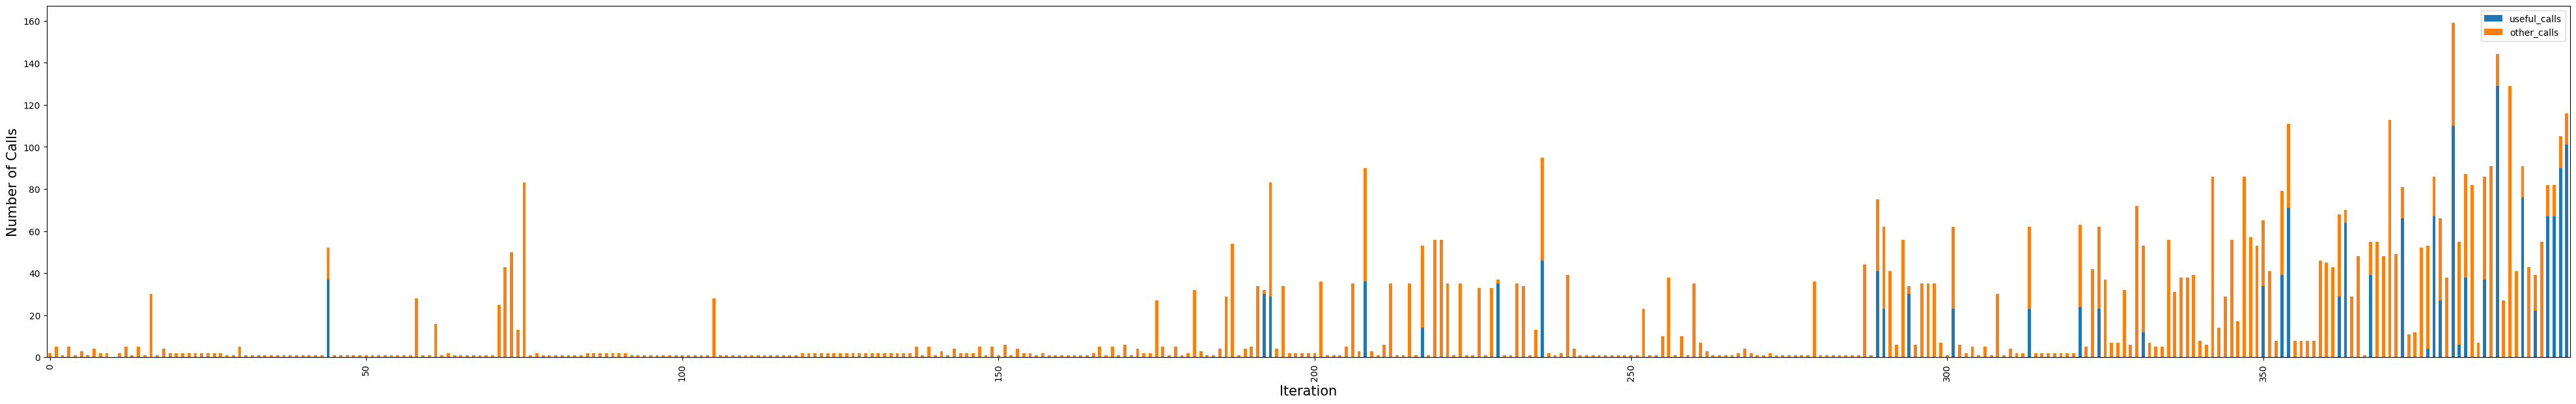

In [125]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'useful_calls':[], 'other_calls':[]}
contract_secs = []


for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        sec_elapsed = 0
        index = 0
        while index < total_calls - 1:
            current_call = data[index][1]["contract"]
            sec_elapsed = data[index][1]["sec_elapsed"]
            #print(current_call)
            #print(target_contracts_set)
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_secs.append(sec_elapsed)
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

# def format_fn(tick_val, tick_pos):
#     if int(tick_val) < 0 or int(tick_val) >= len(contract_secs):
#         return 0
#     return "Iteration: " + str(tick_val) + "; Secs: " + str(contract_secs[int(tick_val)])

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

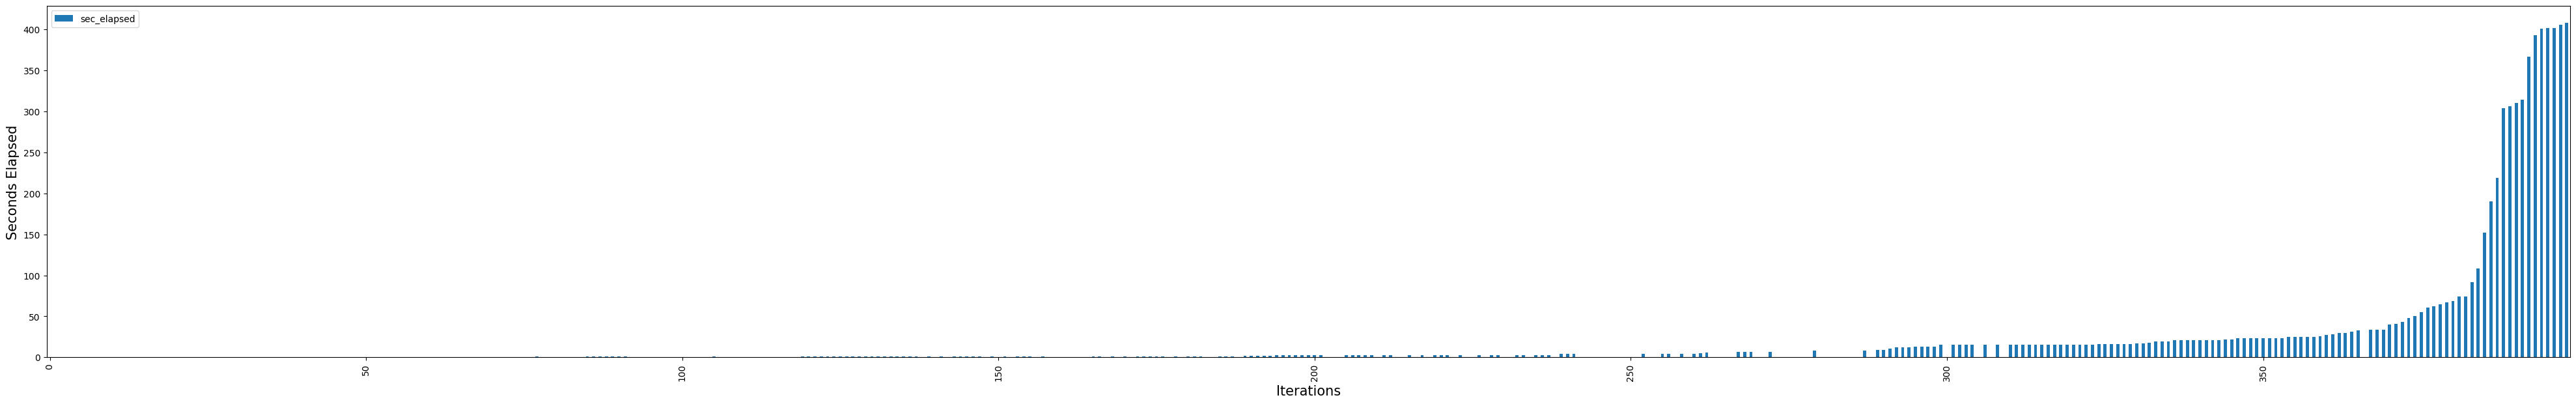

In [126]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': []}


for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        sec_elapsed = 0
        index = 0
        while index < total_calls - 1:
            sec_elapsed = data[index][1]["sec_elapsed"]
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Seconds Elapsed", fontsize=15)
plt.show()

             useful_calls  other_calls
sec_elapsed                           
0                      37          522
1                       0          316
2                      59           99
3                     131          682
4                       0          161
...                   ...          ...
25793                 475           15
25794                 547           15
25873                 514           15
25900                 514           15
28212                 530           15

[149 rows x 2 columns]


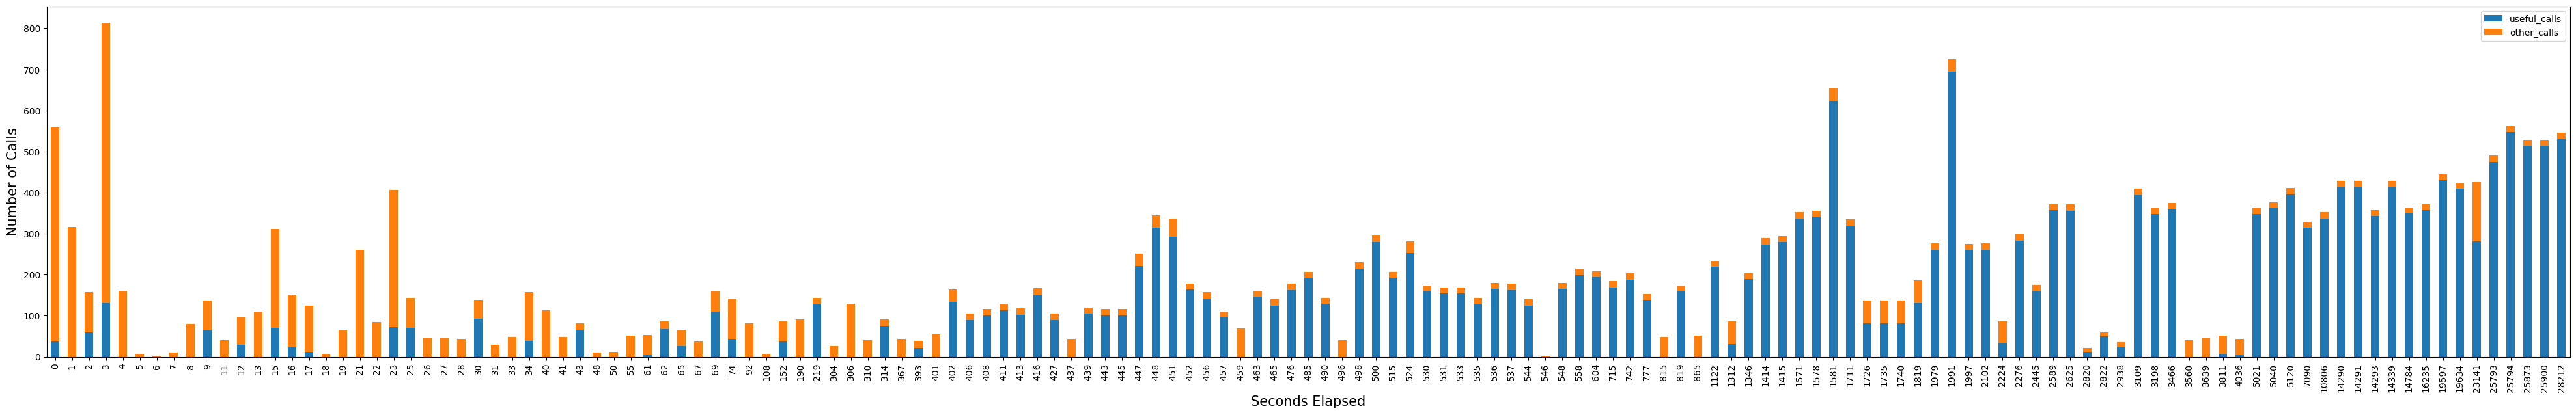

In [105]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': [], 'useful_calls':[], 'other_calls':[]}


for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        sec_elapsed = 0
        index = 0
        while index < total_calls - 1:
            current_call = data[index][1]["contract"]
            sec_elapsed = data[index][1]["sec_elapsed"]
            #print(current_call)
            #print(target_contracts_set)
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
df = df.groupby(['sec_elapsed']).sum()
print(df)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
#loc = plticker.MultipleLocator(base = 10, offset = 0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.xlabel("Seconds Elapsed", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()